In [2]:
# READ DATASET

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_mhs =pd.read_csv('dataset/nilaimahasiswa.csv', sep=';', engine='python')
df_mhs.head()

,Mahasiswa,uts,uas
0,AHMAD,15,46
1,ARFENDO,66,77
2,LATIFUDIN,25,33
3,HENDI,53,81
4,M. FERYAN,20,75


In [5]:
df_mhs.describe()

,uts,uas
count,50.000000,50.000000
mean,56.220000,60.960000
std,27.316953,25.235996
min,12.000000,0.000000
25%,30.250000,45.000000
50%,55.000000,56.000000
75%,71.500000,81.000000
max,100.000000,100.000000


In [6]:
df_mhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mahasiswa  50 non-null     object
 1   uts        50 non-null     int64 
 2   uas        50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


Text(0.5, 1.0, 'SEBARAN NILAI MAHASISWA')

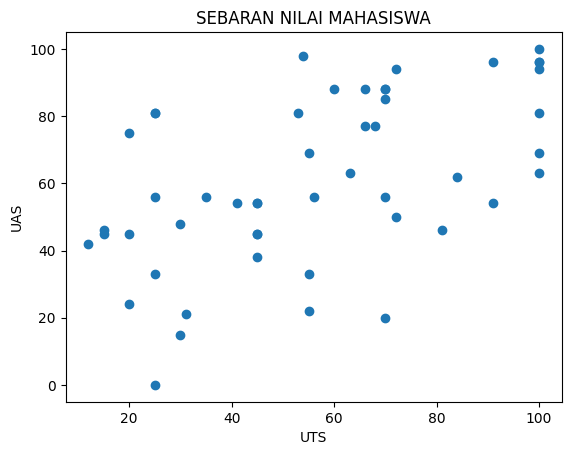

In [7]:
plt.scatter(df_mhs['uts'], df_mhs['uas'])
plt.xlabel('UTS')
plt.ylabel('UAS')
plt.title('SEBARAN NILAI MAHASISWA')

In [8]:
# MEMBUAT DATA TRAINING

In [9]:
x_train = df_mhs[['uts', 'uas']].values
x_train[:5]

array([[15, 46],
       [66, 77],
       [25, 33],
       [53, 81],
       [20, 75]], dtype=int64)

In [10]:
# FETURE SCALIMG
# fearure scaling sangat berpengaruh untuk perhitungan perhitungna 
# yang menggunakan jarak, salah satunya k-means

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train[:5]

array([[0.03409091, 0.46      ],
       [0.61363636, 0.77      ],
       [0.14772727, 0.33      ],
       [0.46590909, 0.81      ],
       [0.09090909, 0.75      ]])

In [12]:
# CLUSTERING

In [13]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean

KMeans(n_clusters=2)

In [14]:
y_cluster = kmean.fit_predict(x_train)
y_cluster

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0])

In [15]:
df_mhs['cluster'] = y_cluster
df_mhs.head()

,Mahasiswa,uts,uas,cluster
0,AHMAD,15,46,1
1,ARFENDO,66,77,0
2,LATIFUDIN,25,33,1
3,HENDI,53,81,0
4,M. FERYAN,20,75,1


In [16]:
    # mengetahui centroid atau cluster center
kmean.cluster_centers_

array([[0.75272727, 0.7836    ],
       [0.25227273, 0.4356    ]])

In [17]:
# VISUALISASI DATA HASIL CLUSTERING

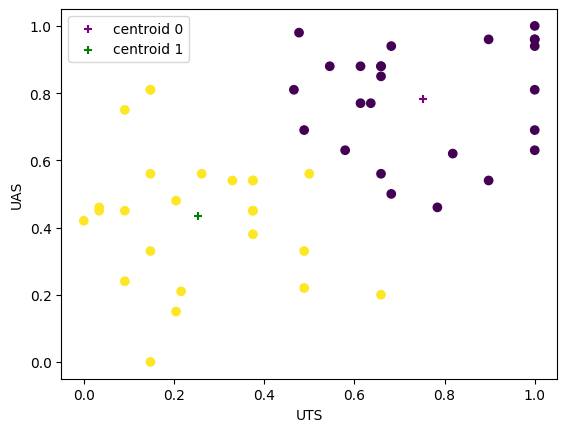

In [18]:
# plt.figure(figsize(10,5))
plt.scatter(x_train[:,0], x_train[:,1],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1],c='purple',marker='+', label = 'centroid 0')
plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1],c='green',marker='+', label = 'centroid 1')
# plt.scatter(kmean.cluster_centers_[2,0],kmean.cluster_centers_[2,1],c='yellow',marker='*', label = 'centroid 2')
plt.xlabel('UTS')
plt.ylabel('UAS')
plt.legend()

In [19]:
# MENCARI K (JUMLAH CLUSTER) TERBAIK

In [20]:
inertias = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)
    print(inertias[k-1])

7.842257805785126
3.197773404958678
2.5448058137626264
1.865799673467029
1.3713889382870916
1.0850249950806767
0.8875765071166207
0.6856527938475665
0.5234387450806768


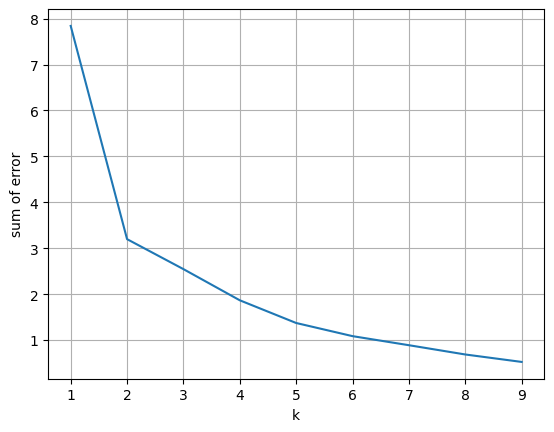

In [21]:
plt.xlabel('k')
plt.ylabel('sum of error')
plt.plot(k_range,inertias)
plt.grid()

In [22]:
# MEMBUAT DATASET BARU DENGAN LABEL CLUSTER

In [23]:
df_mhs['cluster'] = df_mhs['cluster'].replace([0,1],['Kurang', 'Baik'])
df_mhs

,Mahasiswa,uts,uas,cluster
0,AHMAD,15,46,Baik
1,ARFENDO,66,77,Kurang
2,LATIFUDIN,25,33,Baik
3,HENDI,53,81,Kurang
4,M. FERYAN,20,75,Baik
5,RENDI,100,94,Kurang
6,NUREKA,55,69,Kurang
7,INDRA,25,56,Baik
8,MOCH IDWAL,25,81,Baik
9,REYNO YUSUF,30,48,Baik
